<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Polinomial%20Regression/Regress%C3%A3o_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Polinomial**

In [1]:
import pandas as pd
import numpy as np

In [6]:
arquivo = '/content/drive/MyDrive/Udemy/comissao.xlsx'
dados = pd.read_excel(arquivo)

## **Análise Inicial**

In [12]:
dados.head()

,quantidade,comissao
0,1,728
1,2,762
2,3,802
3,4,848
4,5,900


In [10]:
dados.shape

(50, 2)

In [11]:
dados.dtypes

quantidade    int64
comissao      int64
dtype: object

In [13]:
dados = dados.astype( {"comissao" : float} )
dados.dtypes

quantidade      int64
comissao      float64
dtype: object

### **Valores Missing (Nan)**

In [15]:
dados.isnull().sum()

quantidade    0
comissao      0
dtype: int64

### **Gráfico para Análise Inicial**

In [16]:
import matplotlib.pyplot as plt

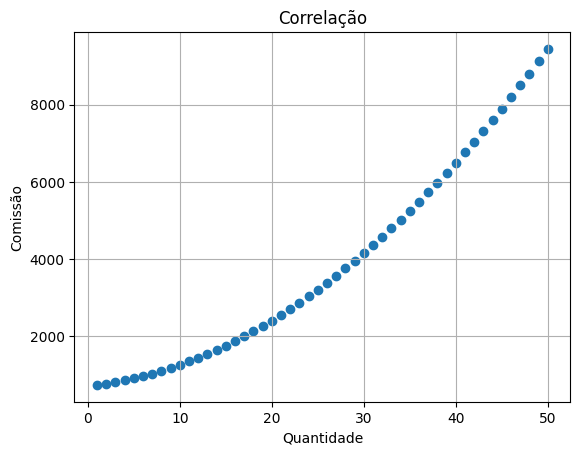

In [19]:
plt.scatter(dados['quantidade'], dados['comissao'])
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

#### **Normalidade**

In [20]:
import scipy.stats as stats

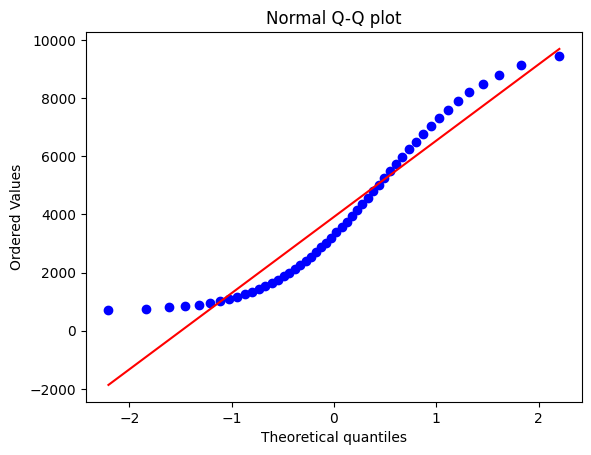

In [21]:
stats.probplot(dados['comissao'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

#### **Teste Shapiro-Wilk**

Ho - Distribuiçã Normal: p > 0.05

Ha - Distribuição NÃO Normal: p <= 0.05

In [23]:
estatistica, p = stats.shapiro(dados['comissao'])
print('Estatística do teste: {:.2f}%'.format(estatistica * 100))
print('p-value: {}'.format(p))


Estatística do teste: 91.25%
p-value: 0.0012719858204945922


### **Correlação Linear**

Pearson (Distribuição Normal) - **NÃO PODEMOS NESTE CASO**

Spearman (Distribuição Não Normal )

Kendall (Distribuição Não Normal com Quantidade Pequena de Amostras)

Ho - Não há Correlação Linear: p > 0.05

Ha - Há Correlação Linear: p <= 0.05

In [26]:
# Spearman
coef, p = stats.spearmanr(dados['quantidade'], dados['comissao'])
print("Coeficiente de Correlação: {:.2f}%".format(coef * 100))
print("p-value: {}".format(p))

Coeficiente de Correlação: 100.00%
p-value: 0.0


## **Modelo - Regressão Linear**

In [27]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [28]:
# Criação do Modelo
regressao = smf.ols('comissao ~ quantidade', data = dados).fit()

In [29]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           5.98e-34
Time:                        00:06:02   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

Estatística t:

Ho - coeficiente igual a zero: p > 0.05 ( coeficiente não validado )

Ha - coeficiente diferente de zero: p <= 0.05 ( coeficiente validado )

**Equação: -626.0000 + ( 178.0000 * quantidade )**

**R^2 Ajustado = 0,954**


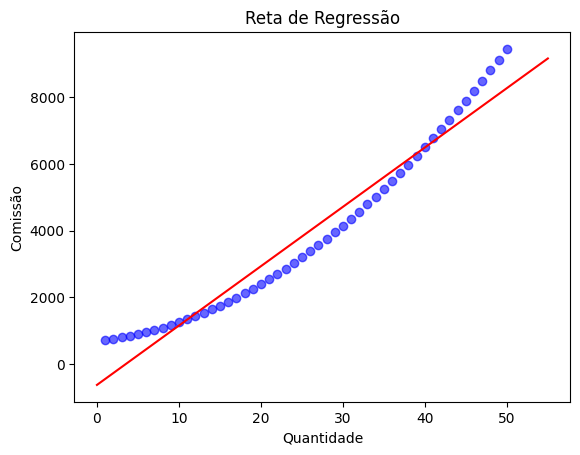

In [33]:
plt.scatter(x=dados['quantidade'], y=dados['comissao'], color='blue', alpha=0.6)
X_plot = np.linspace(0, 55)
plt.plot( X_plot, regressao.params[0] + regressao.params[1] * X_plot, color='r' )
plt.title("Reta de Regressão")
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(False)
plt.show()

In [34]:
regressao.params

Intercept    -626.0
quantidade    178.0
dtype: float64